import libraries and data, assign path

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#assign path
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 4\Instacart Basket Analysis'

In [4]:
#import combined updated dataset
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [5]:
ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 36 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int64   
 1   user_id                     int64   
 2   eval_set                    object  
 3   order_number                int64   
 4   orders_day_of_week          int64   
 5   order_hour_of_day           int64   
 6   days_since_prior_order      float64 
 7   product_id                  int64   
 8   add_to_cart_order           int64   
 9   reordered                   int64   
 10  product_name                object  
 11  aisle_id                    int64   
 12  department_id               int64   
 13  prices                      float64 
 14  match                       category
 15  price_range_loc             object  
 16  busiest_day                 object  
 17  busiest_days                object  
 18  busiest_period_of_day       object  
 19

create bar chart, histogram, scatterplot, line chart (with sampled subset)

In [7]:
#create bar chart

<Axes: xlabel='orders_day_of_week'>

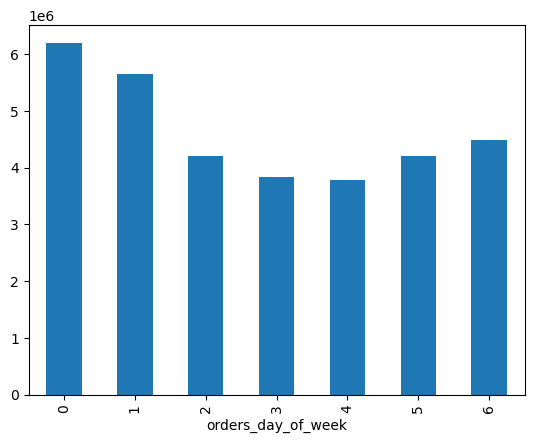

In [8]:
ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

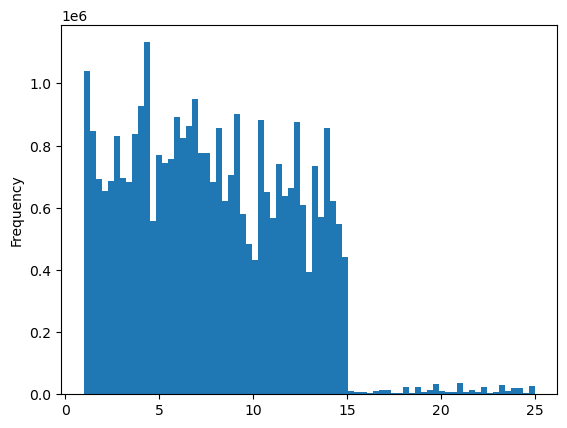

In [9]:
#create histogram
ords_prods_customers['prices'].plot.hist(bins = 75)
#set bins at 75 for a finer grain of detail

<Axes: xlabel='prices', ylabel='prices'>

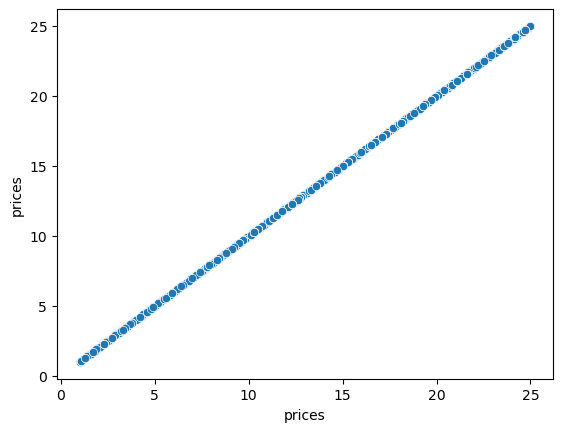

In [10]:
#create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_customers)

In [11]:
#create a sample subset to use for line chart
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers)) <=0.8

In [12]:
big = ords_prods_customers[dev]
small = ords_prods_customers[~dev]

In [13]:
#check for size of sample subsets
len(ords_prods_customers)

32399732

In [14]:
len(big)+len(small)

32399732

In [15]:
df2 = small[['orders_day_of_week','prices']]

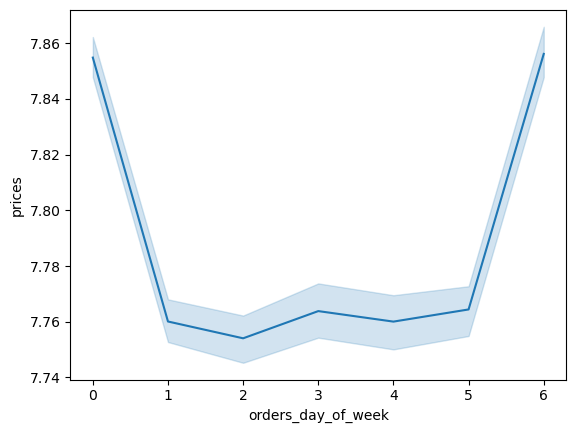

In [16]:
line = sns.lineplot(data = df2, x = 'orders_day_of_week',y = 'prices')

Create histogram for order_hour_of_day

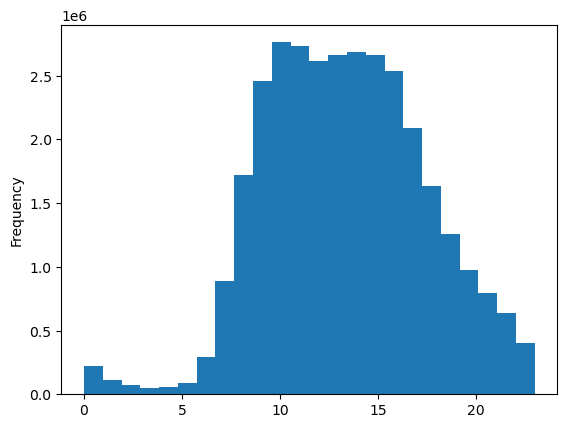

In [18]:
hist1 = ords_prods_customers['order_hour_of_day'].plot.hist(bins = 24)

This histogram shows the frequency of orders placed throughout the day. Because the data on orders is measured by the hour, I set the number of bins in the histogram to 24.
This histogram shows that the number of orders placed is highest around noon and in the afternoon, with order numbers slowly decreasing during the evening. 
The least orders are placed at nighttime and in the early morning.

Create a bar chart for the loyalty flag

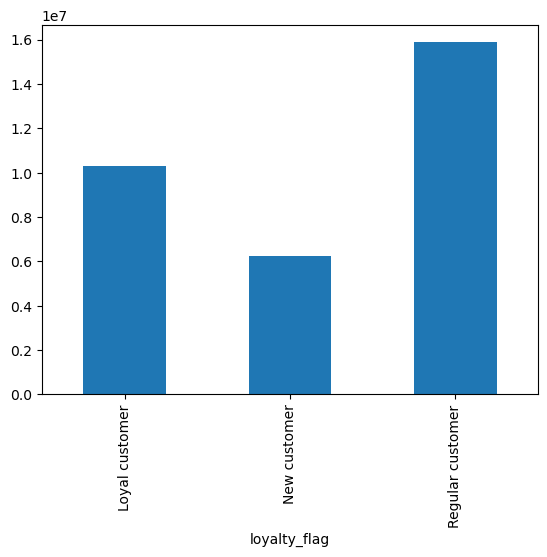

In [21]:
bar2 = ords_prods_customers['loyalty_flag'].value_counts().sort_index().plot.bar()

Check the relationship between expenditure (prices column) and hour of day using a line chart

In [23]:
#create a subset based on the smaller sample with 20% of the total dataframe, caontaining the two columns to compare in the line chart
df3 = small[['order_hour_of_day','prices']]

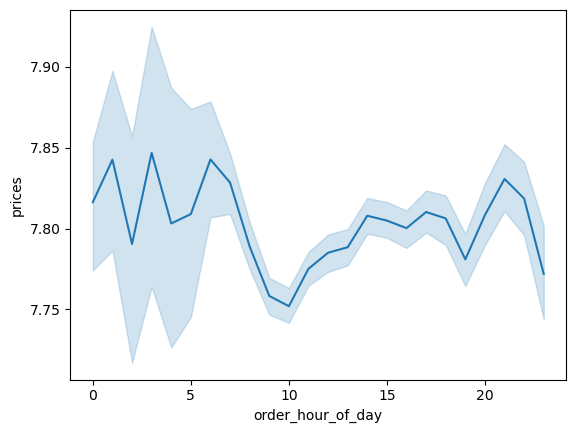

In [24]:
line = sns.lineplot(data = df3, x = 'order_hour_of_day',y = 'prices')

Expenditure peaks in the early morning hours (around 3:00 and around 6:00) and is lowest around 10:00 before slowly increasing during the rest of the day.

The amount spent varies the most between midnight and 5:00. There is the least amount of variation in the expenditure during the morning hours, between approximately 6:00 and noon.

Determining a connection between customer age and family situation

In [27]:
#create a new subset to use for this line chart
df4 = small[['age','n_dependants']]

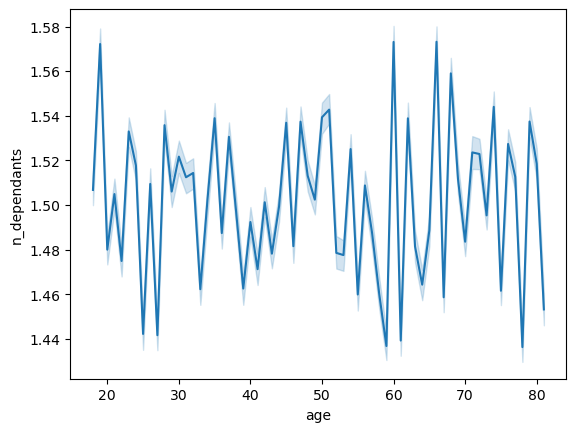

In [28]:
#create line chart showing relationship between customer age and number of dependents
line2 = sns.lineplot(data = df4, x = 'age',y = 'n_dependants')

The average number of dependents a customer has appears to peak at a both a very young age (under 20 years) and at older ages (60-70 years).

However, there generally does not appear to be a particularly strong connection between age and number of dependents.

Determining relationship between age and spending power (income)

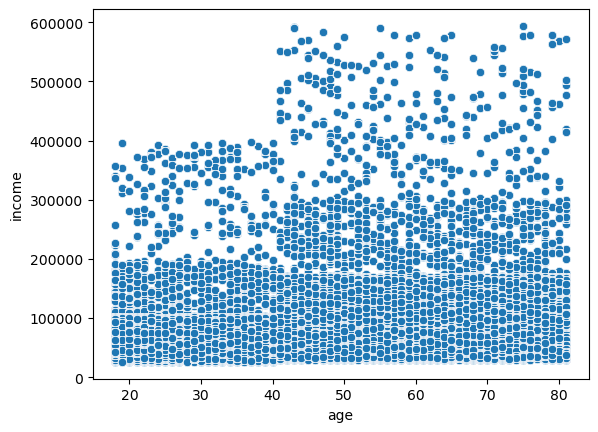

In [31]:
#create scatterplot showing relationship between age and income
scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customers)

Overall, there are relatively few customers earning more than 300000 across all ages.
There is a significant increase in average income in customers over age 40. All customers earning more than 400000 are also part of that age group, with no younger customers earning that amount. 

In [33]:
#export visualizations
#export bar chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [34]:
#export order_hour_of_day histogram
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_order_hour_day.png'))

In [35]:
#export spend by hour line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hour_day.png'))

In [36]:
#export age and number of dependents line chart
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_deps.png'))

In [37]:
#export age and income scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))